In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score

In [2]:
# bank = pd.read_excel('C:\\Users\\Iyanu\\Documents\\olympicmedal.xlsx')
bank =  pd.read_csv('C:\\Users\\Iyanu\\Documents\\bank.csv', sep=';')

In [489]:
len(bank)

4521

In [492]:
# doesnt work, unlike JSON data
# bank[0]

In [3]:
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
bank.shape

(4521, 17)

In [5]:
bankCopy = bank.copy()

In [6]:
bankCopy['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [7]:
(4000/4521)*100

88.47600088476001

In [8]:
pd.isnull(bankCopy).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# X = bankCopy.drop('y', axis=1)
# y = bankCopy['y']

In [10]:
# from sklearn.utils import resample

In [11]:
# create a variable yes and no to keep the target(yes and no)
# no = bank[bank['y'] == 'no']
# yes = bank[bank['y'] == 'yes']

In [12]:
# resample to get equal number of yes and no
# upscaledYes = resample(yes, replace=True, n_samples=len(no), random_state=42)

In [13]:
# concatenate the no and the new yes
# newTrain = pd.concat([no, upscaledYes])

In [14]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [15]:
bank.shape

(4521, 17)

In [16]:
bank.tail()

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

In [58]:
newTrain2 = bank.copy()

In [59]:
newTrain2.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [60]:
newTrain2['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [61]:
newTrain2.shape

(4521, 17)

In [62]:
new = []
for value in newTrain2['y']:
    if value == 'yes':
        new.append(1)
    else:
        new.append(0)

In [63]:
newTrain2['new'] = new

In [64]:
y = newTrain2['y']

In [65]:
def dropColumn(data, col):
    return data.drop(col, axis=1)

In [66]:
newTrain2 = dropColumn(newTrain2, ['y'])

In [67]:
newTrain2.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  new  
0  cellular   19   oct        79         1     -1         0  unknown    0  
1  cellular   11   may       220         1    339         4  failure    0  
2  cellular   16   apr       185         1    330         1  failure    0  
3   unknown    3   jun       199         4     -1         0  unknown    0  
4   unknown    5   may       226         1     -1         0  unknown    0

## FEATURES: JOB

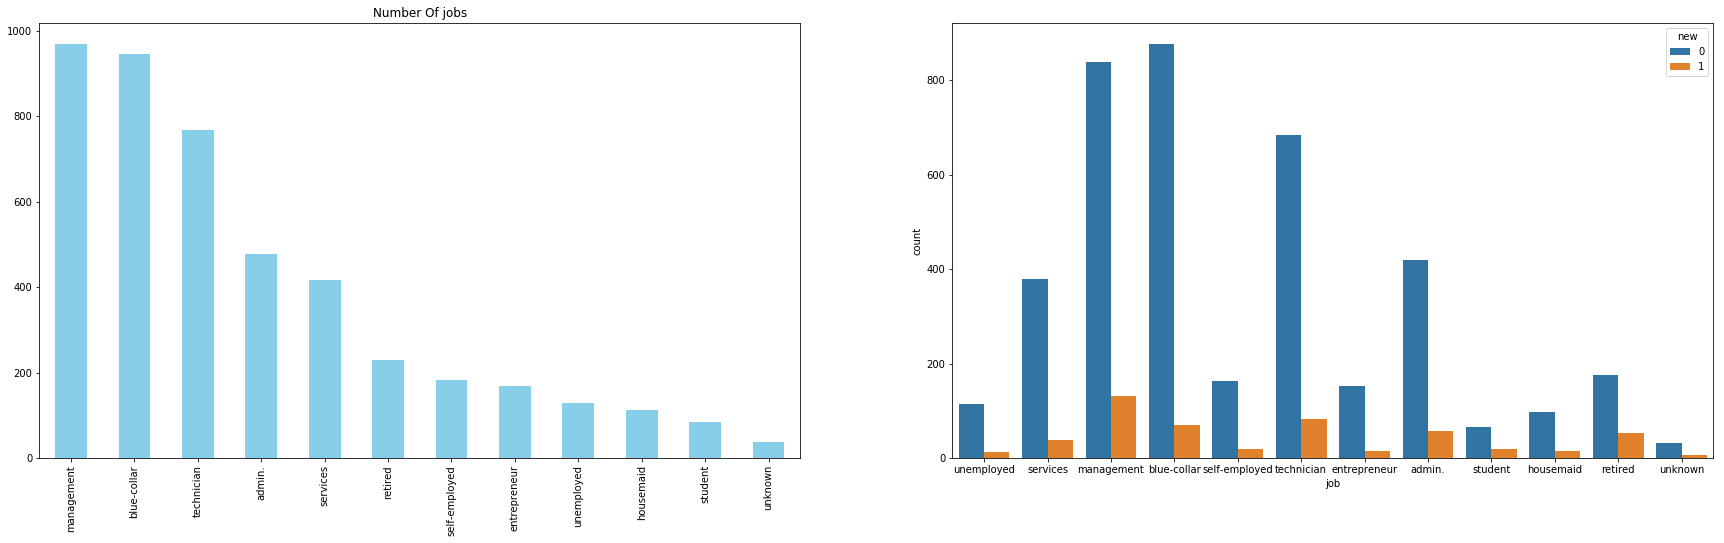

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["job"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("job", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


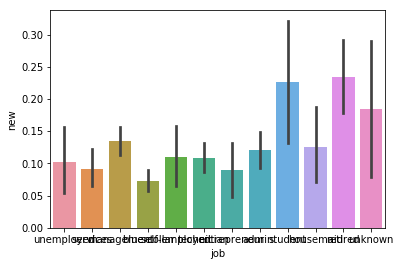

In [69]:
sns.barplot(x = "job", y = "new", data = newTrain2)

In [70]:
pd.crosstab([newTrain2["job"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

In [71]:
newTrain2.groupby("job")["new"].mean()

job
admin.           0.121339
blue-collar      0.072939
entrepreneur     0.089286
housemaid        0.125000
management       0.135191
retired          0.234783
self-employed    0.109290
services         0.091127
student          0.226190
technician       0.108073
unemployed       0.101562
unknown          0.184211
Name: new, dtype: float64

### FEATURE: marital

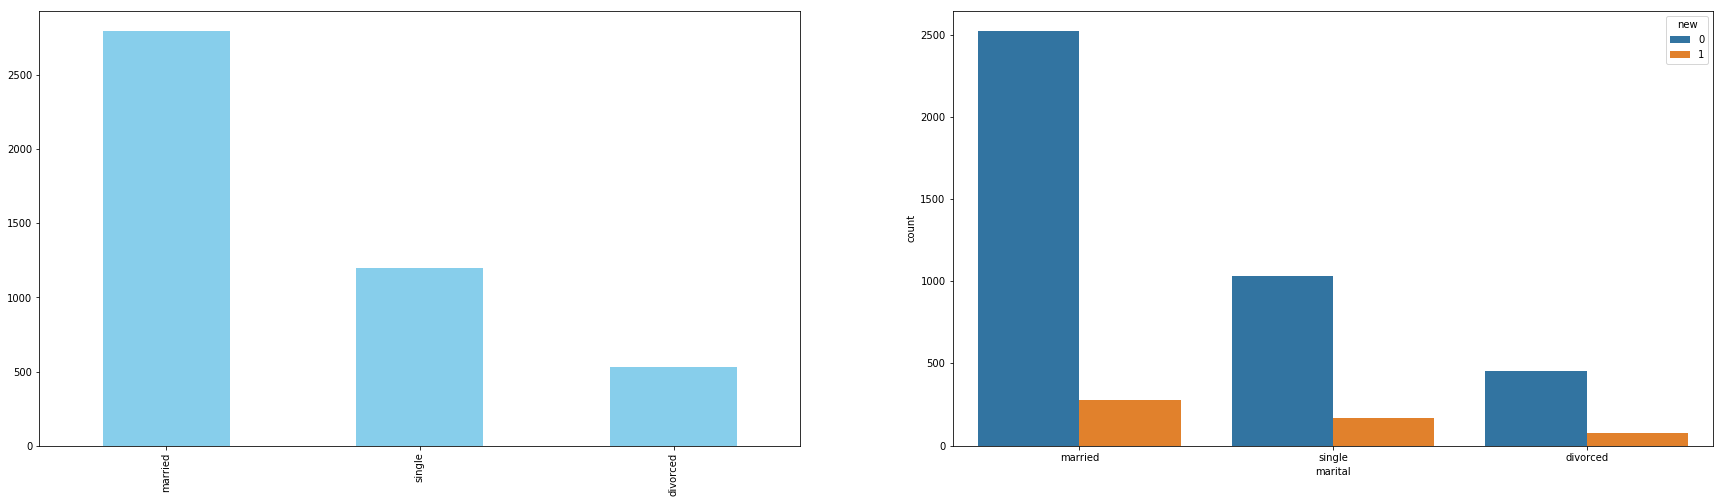

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["marital"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
sns.countplot("marital", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [73]:
pd.crosstab([newTrain2["marital"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

### FEATURES: education

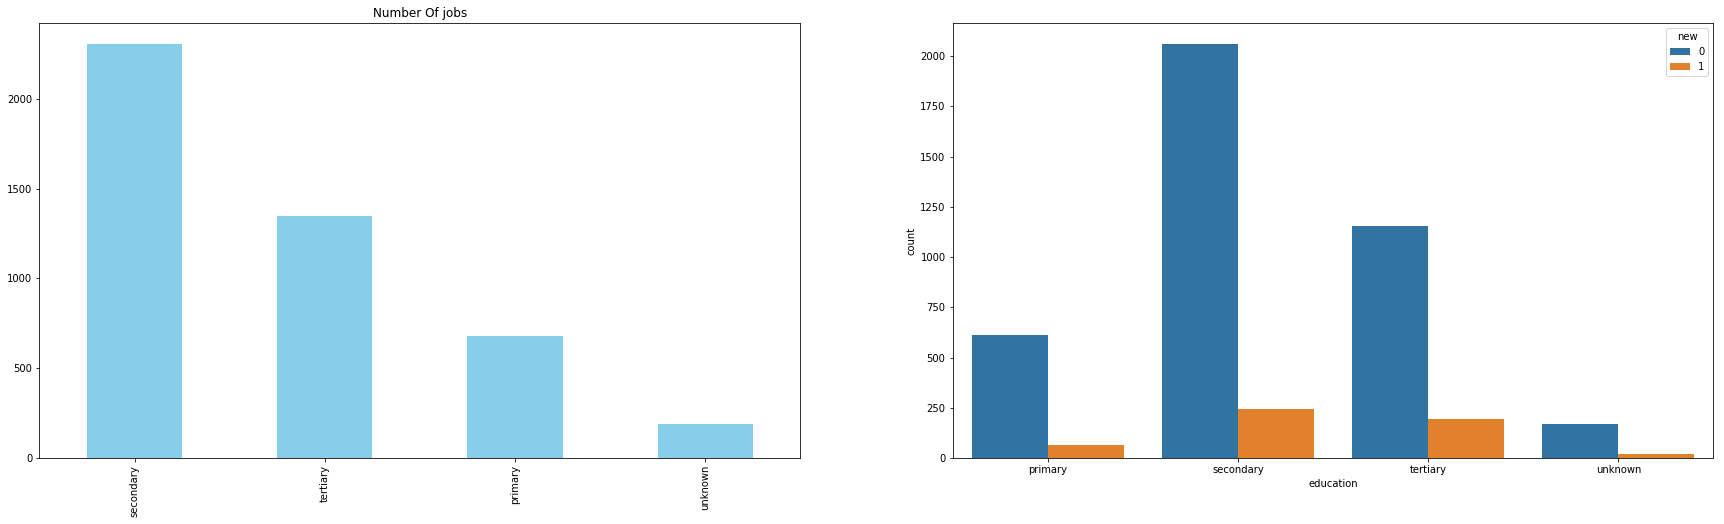

In [74]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["education"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("education", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [75]:
pd.crosstab([newTrain2["education"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

#### FEATURE: housing

In [76]:
pd.crosstab([newTrain2["housing"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

In [77]:
pd.crosstab([newTrain2["loan"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

In [78]:
new2 = []
for value in newTrain2['housing']:
    if value == 'yes':
        new2.append(1)
    else:
        new2.append(0)

In [79]:
new1 = []
for value in newTrain2['loan']:
    if value == 'yes':
        new1.append(1)
    else:
        new1.append(0)

In [80]:
len(new2)

4521

In [81]:
newTrain2['housing'] = new2
newTrain2['loan'] = new1

In [82]:
newTrain2.head()

age          job  marital  education default  balance  housing  loan  \
0   30   unemployed  married    primary      no     1787        0     0   
1   33     services  married  secondary      no     4789        1     1   
2   35   management   single   tertiary      no     1350        1     0   
3   30   management  married   tertiary      no     1476        1     1   
4   59  blue-collar  married  secondary      no        0        1     0   

    contact  day month  duration  campaign  pdays  previous poutcome  new  
0  cellular   19   oct        79         1     -1         0  unknown    0  
1  cellular   11   may       220         1    339         4  failure    0  
2  cellular   16   apr       185         1    330         1  failure    0  
3   unknown    3   jun       199         4     -1         0  unknown    0  
4   unknown    5   may       226         1     -1         0  unknown    0

In [83]:
# del newTrain2['housing']
# del newTrain2['loan']


##### FEATURES:duration

In [84]:
pd.crosstab([newTrain2["duration"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

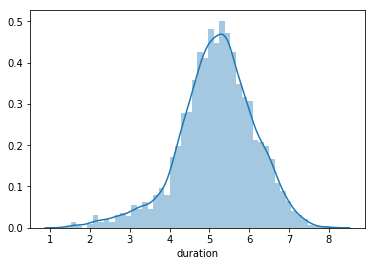

In [85]:
durationLog = np.log(newTrain2['duration'])
sns.distplot(durationLog)

In [86]:
# newTrain2['duration'] = durationLog

In [87]:
newTrain2 = newTrain2.drop('day', axis=1)

In [88]:
newTrain2 = newTrain2.drop('previous', axis=1)

In [89]:
# newTrain2 = newTrain2.drop('', axis=1)

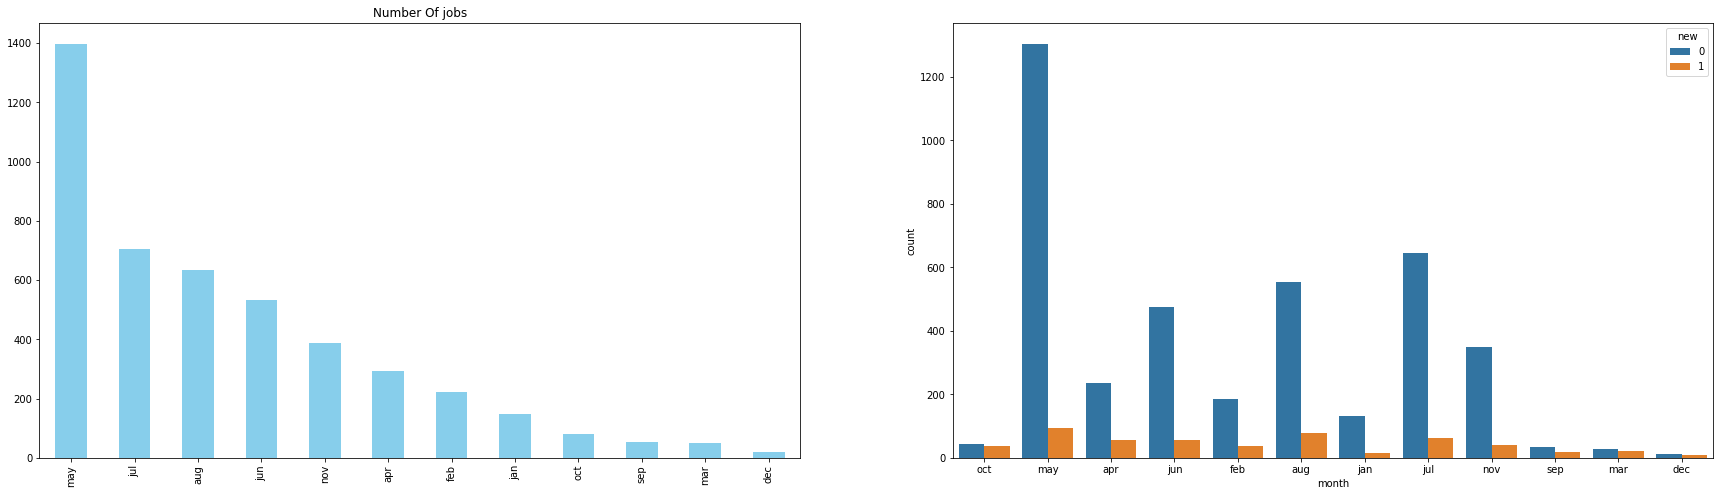

In [90]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["month"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("month", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [91]:
pd.crosstab([newTrain2["month"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

#### FEARURE:campaign

In [92]:
newTrain2["campaign"].value_counts()

1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
28       3
24       3
20       3
19       3
21       2
23       2
22       2
32       2
29       1
44       1
30       1
50       1
31       1
Name: campaign, dtype: int64

In [93]:
pd.crosstab([newTrain2["campaign"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

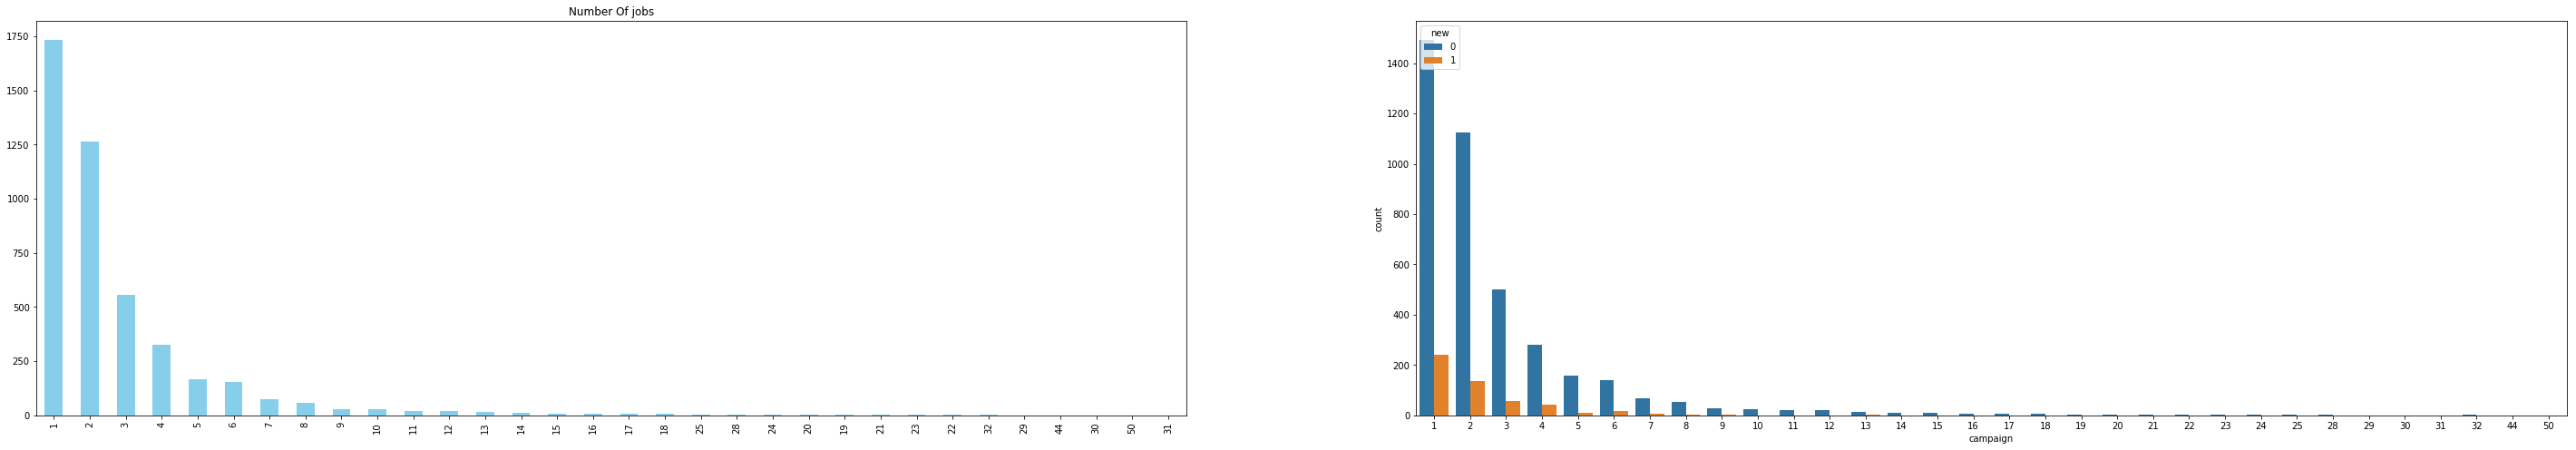

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (50, 8))
newTrain2["campaign"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("campaign", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [95]:
# campaignLog = np.log(train['campaign'])
# sns.distplot(campaignLog)

In [96]:
del newTrain2['campaign']

#### FEATURE: poutcome

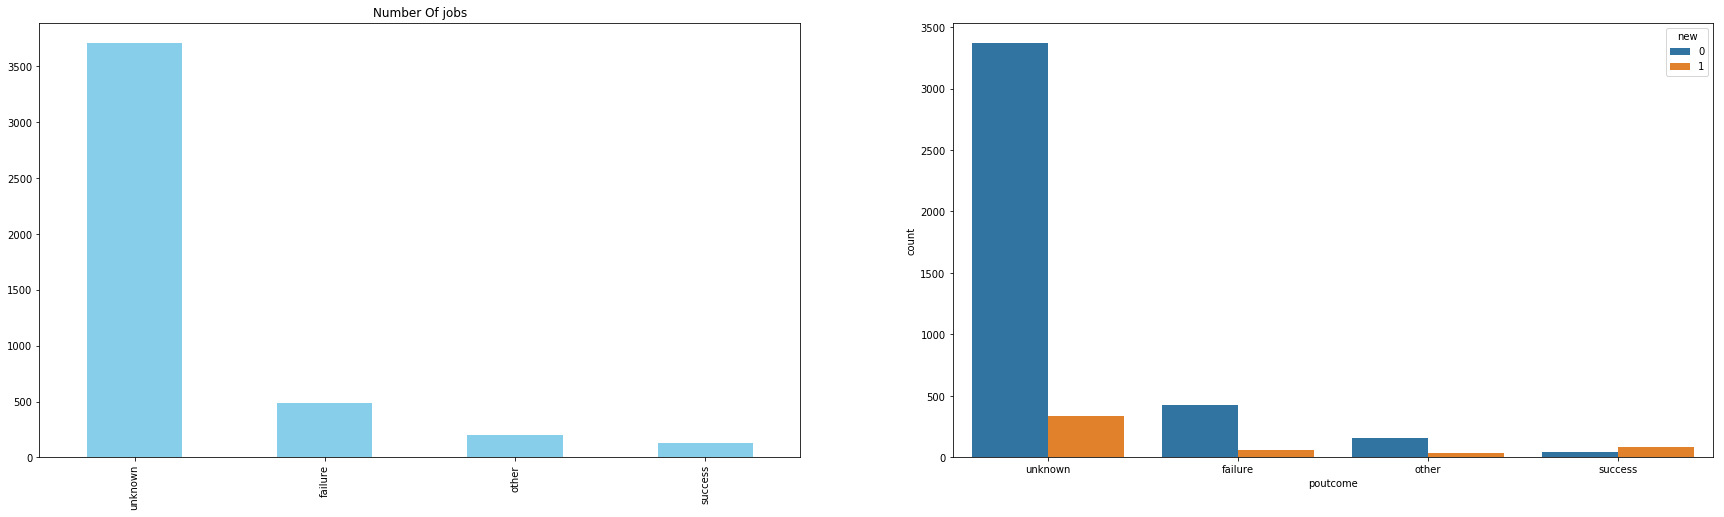

In [97]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["poutcome"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("poutcome", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [98]:
pd.crosstab([newTrain2["poutcome"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

In [99]:
newTrain2.head()

age          job  marital  education default  balance  housing  loan  \
0   30   unemployed  married    primary      no     1787        0     0   
1   33     services  married  secondary      no     4789        1     1   
2   35   management   single   tertiary      no     1350        1     0   
3   30   management  married   tertiary      no     1476        1     1   
4   59  blue-collar  married  secondary      no        0        1     0   

    contact month  duration  pdays poutcome  new  
0  cellular   oct        79     -1  unknown    0  
1  cellular   may       220    339  failure    0  
2  cellular   apr       185    330  failure    0  
3   unknown   jun       199     -1  unknown    0  
4   unknown   may       226     -1  unknown    0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A62A875828>,
      dtype=object)

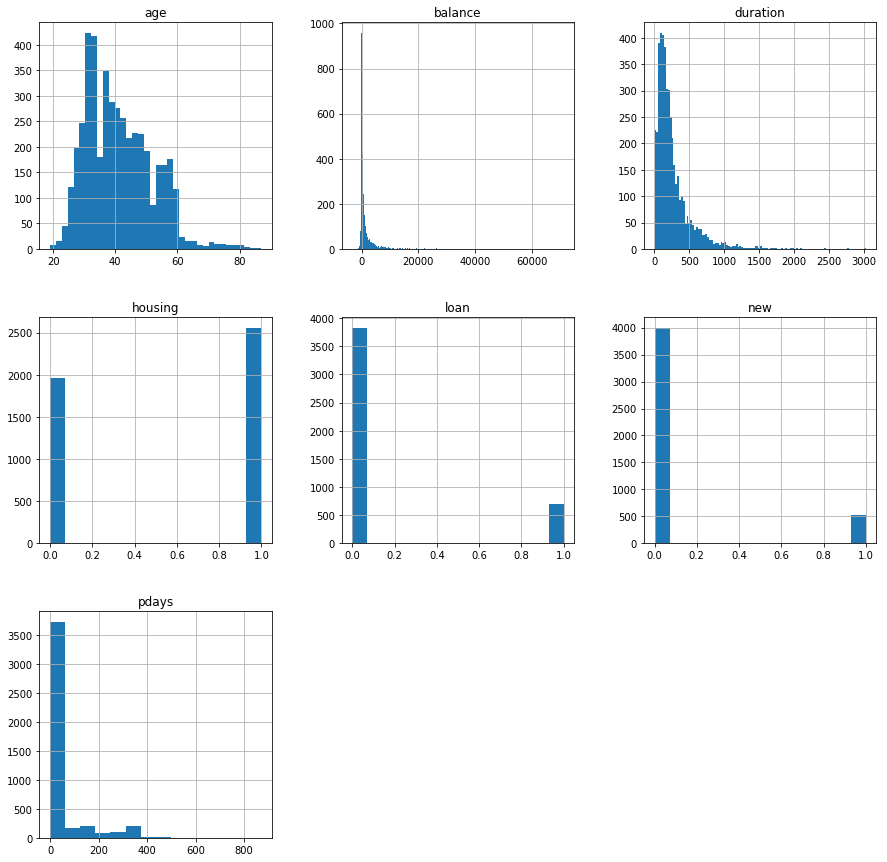

In [100]:
newTrain2.hist(figsize=(15,15), bins='auto')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A62B542F28>,
      dtype=object)

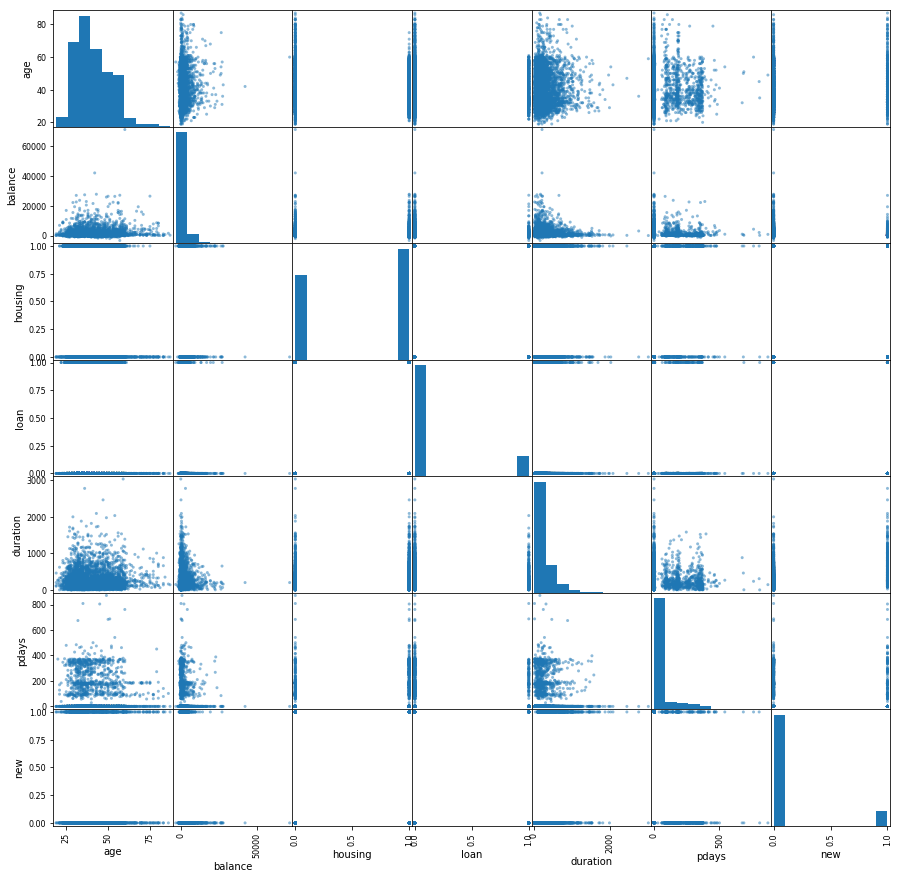

In [101]:
pd.plotting.scatter_matrix(newTrain2, figsize=(15,15))

### FEATURE: balance

In [102]:
newTrain2['balance'].value_counts().sum()

4521

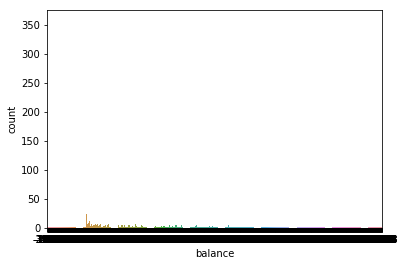

In [103]:
sns.countplot(newTrain2['balance'])

In [104]:
pd.crosstab([newTrain2["balance"]], newTrain2["new"], 
            margins = True).style.background_gradient(cmap = "summer_r")

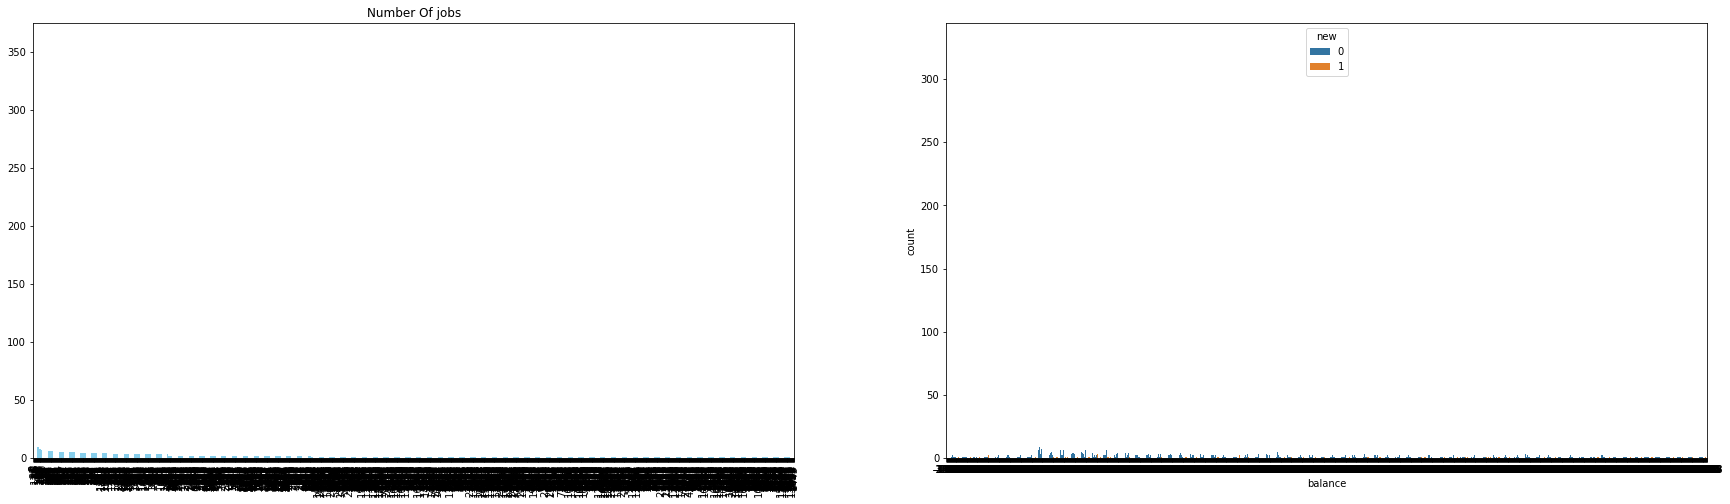

In [105]:
fig, ax = plt.subplots(1, 2, figsize = (30, 8))
newTrain2["balance"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of jobs")
sns.countplot("balance", hue = "new", data = newTrain2, ax = ax[1]) #  edgecolor=sns.color_palette("dark", 3)


In [106]:

# def oneHotEncoding(data, col):
#     return pd.get_dummies(data, columns=col)

In [107]:
# newTrain2 = oneHotEncoding(newTrain2, ['marital'])

In [108]:
# def title2int(data):
#     data["Title"].replace(["Major", "Capt", "Sir", "Dr", "Don", "Mlle", "Mme", "Ms", "Dona", "Lady", "the Countess", "Jonkheer", "Col", "Rev"],
#                            ["Mr", "Mr", "Mr", "Mr", "Mr", "Miss", "Miss", "Miss", "Mrs", "Mrs", "Mrs", "Other", "Other", "Other"], inplace = True)
#     data["Title"].replace(["Mr", "Miss", "Mrs", "Master", "Other"], [0, 1, 2, 3, 4], inplace = True)
#     return data

# train = title2int(train)

### feature: contact

In [109]:
newTrain2['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

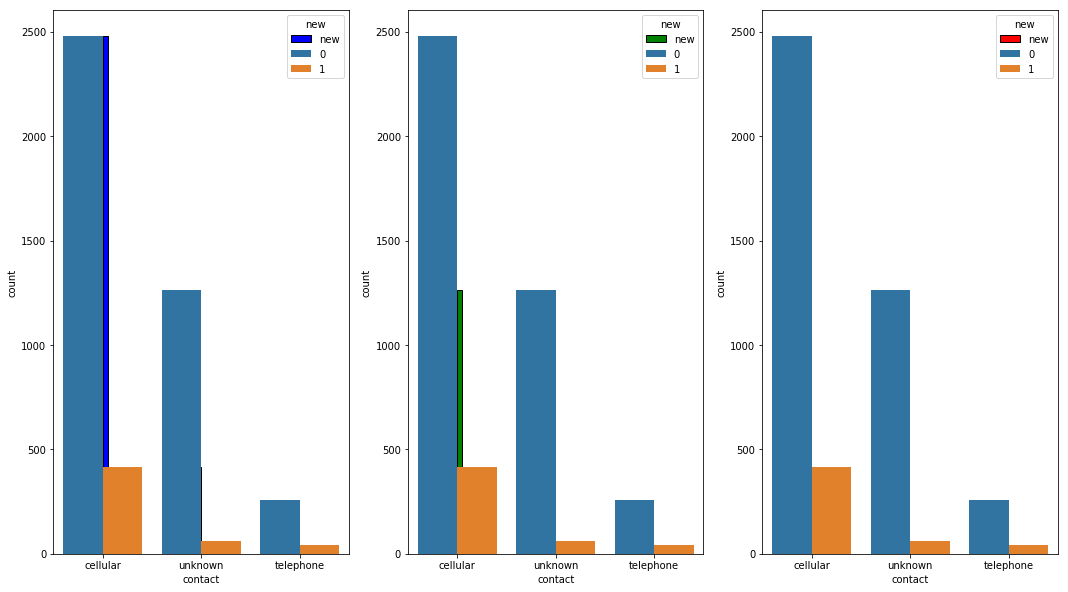

In [110]:
fig, ax = plt.subplots(1, 3, figsize = (18, 10))
newTrain2[newTrain2["contact"] == 'cellular']["new"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
sns.countplot("contact", hue = "new", data = newTrain2, ax = ax[0])

newTrain2[newTrain2["contact"] == 'unknown']["new"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
sns.countplot("contact", hue = "new", data = newTrain2, ax = ax[1])

newTrain2[newTrain2["contact"] == 'telephone']["new"].plot.hist(ax = ax[2], bins = 20, edgecolor = "black", color = "red")
sns.countplot("contact", hue = "new", data = newTrain2, ax = ax[2])


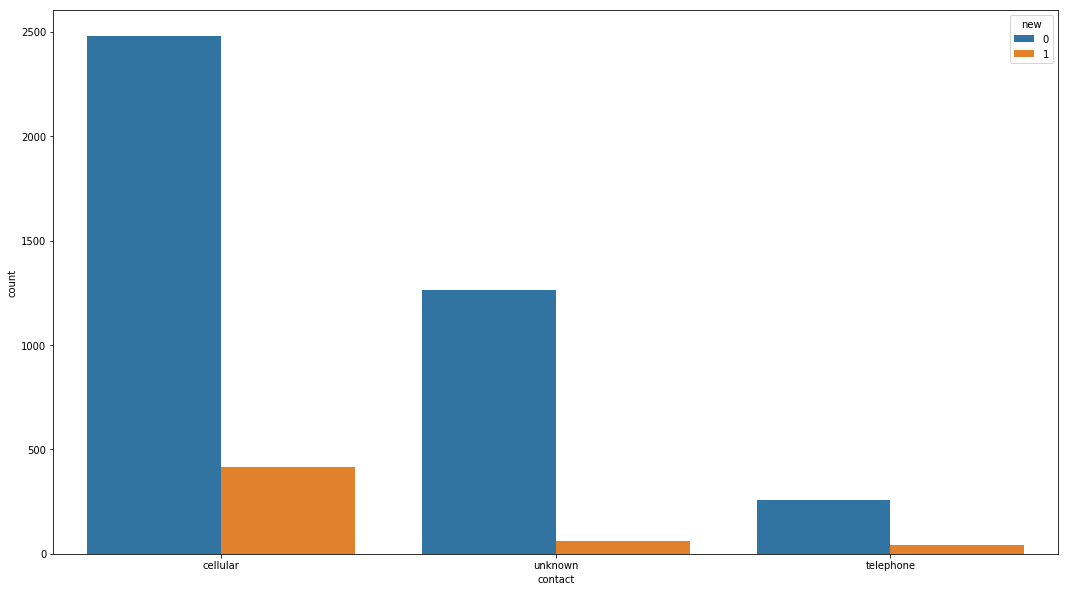

In [111]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.countplot("contact", hue = "new", data = newTrain2,)

### features: default

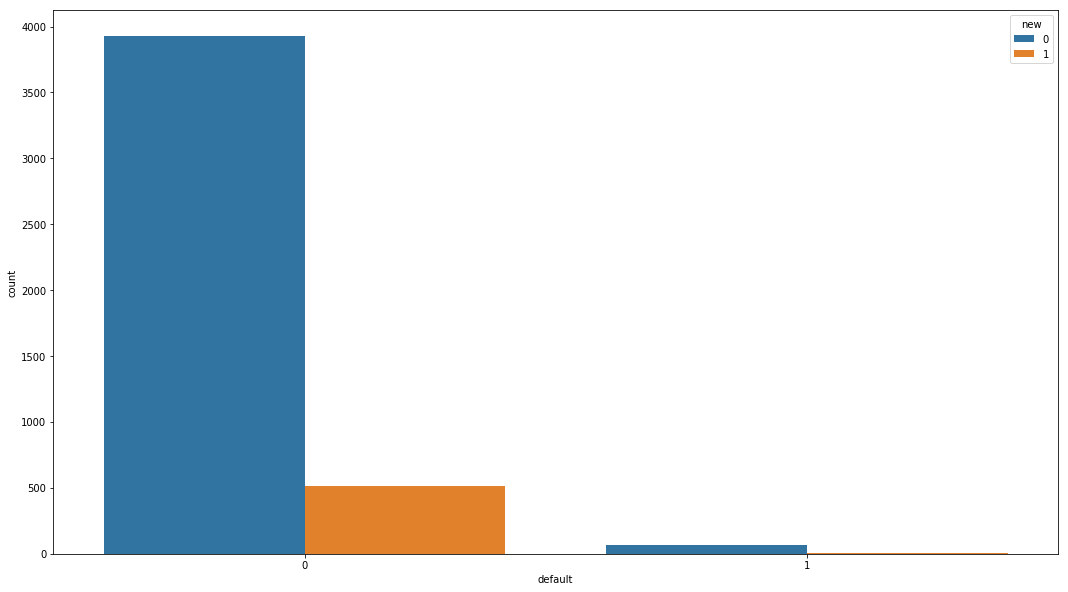

In [130]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.countplot("default", hue = "new", data = newTrain2,)

In [131]:
newTrain2['default'].value_counts()

0    4440
1      76
Name: default, dtype: int64

In [132]:
new1 = []
for value in newTrain2['default']:
    if value == 'yes':
        new1.append(1)
    else:
        new1.append(0)
newTrain2['default'] = new1


In [133]:
# newtrain2 = newtrain2.drop('poutcome', axis=1)

In [134]:
newTrain2.corr()

age  default   balance   housing      loan  duration     pdays  \
age       1.000000      NaN  0.083653 -0.192940 -0.010796 -0.001956 -0.008457   
default        NaN      NaN       NaN       NaN       NaN       NaN       NaN   
balance   0.083653      NaN  1.000000 -0.050072 -0.071291 -0.015640  0.009509   
housing  -0.192940      NaN -0.050072  1.000000  0.017928  0.015128  0.116473   
loan     -0.010796      NaN -0.071291  0.017928  1.000000 -0.005233 -0.031284   
duration -0.001956      NaN -0.015640  0.015128 -0.005233  1.000000  0.010161   
pdays    -0.008457      NaN  0.009509  0.116473 -0.031284  0.010161  1.000000   
new       0.045527      NaN  0.017971 -0.105223 -0.070699  0.401097  0.103941   

               new  
age       0.045527  
default        NaN  
balance   0.017971  
housing  -0.105223  
loan     -0.070699  
duration  0.401097  
pdays     0.103941  
new       1.000000

In [135]:
newTrain3 = newTrain2.copy()

In [136]:
newTrain2['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           33
Name: job, dtype: int64

In [166]:
newTrain2 = newTrain2.drop('poutcome', axis=1)

In [167]:
newTrain2 = newTrain2.dropna(thresh=3)

In [168]:
# toRemove = newTrain2[(newTrain2['job'] == 'unknown')&(newTrain2['contact'] == 'unknown')&(newTrain2['education'] == 'unknown')]

In [169]:
# toRemove.index

In [170]:
# toRemove

In [171]:
# newTrain2 = newTrain2.drop(toRemove.index)

In [172]:
newTrain2.shape

(4516, 12)

In [173]:
newTrain2[(newTrain2['job'] == 'unknown')]
# &(newTrain2['contact'] == 'unknown')&(newTrain2['poutcome'] == 'unknown')&(newTrain2['education'] == 'unknown')

age      job   marital  education  default  balance  housing  loan  \
95     41  unknown    single   tertiary        0     1567        0     0   
230    52  unknown   married  secondary        0      142        0     0   
779    55  unknown   married    primary        0      159        0     0   
1076   54  unknown   married  secondary        0     2206        0     0   
1266   54  unknown   married    unknown        0      895        0     0   
1432   35  unknown   married    primary        0      365        0     0   
1441   49  unknown   married    unknown        0      301        0     0   
1462   33  unknown   married  secondary        0     2727        0     0   
1489   27  unknown    single   tertiary        0     6421        0     0   
1517   53  unknown   married    unknown        0       13        0     0   
1569   43  unknown    single    unknown        0      181        0     0   
1681   65  unknown   married    unknown        0      300        0     0   
2047   43  unknown   married   tertiary        0     1937        0     0   
2081   48  unknown   married    unknown        0      286        0     0   
2394   44  unknown   married  secondary        0     2319        0     0   
2477   53  unknown   married    primary        0      732        0     0   
2486   50  unknown   married    unknown        0      558        0     0   
2487   31  unknown  divorced   tertiary        0      137        0     0   
2711   47  unknown   married    unknown        0      677        0     0   
2736   54  unknown   married  secondary        0     1157        0     0   
2805   35  unknown   married    primary        0      634        0     0   
3366   52  unknown   married    primary        0      247        0     0   
3385   38  unknown    single   tertiary        0        0        0     0   
3529   43  unknown    single   tertiary        0     2731        0     0   
3843   50  unknown   married    primary        0      341        1     1   
3877   62  unknown   married  secondary        0      367        0     0   
3963   60  unknown   married    unknown        0     7337        0     0   
3986   30  unknown    single   tertiary        0     6836        0     0   
3990   49  unknown   married  secondary        0        0        0     0   
4038   71  unknown   married   tertiary        0      353        0     0   
4155   39  unknown    single  secondary        0      914        0     0   
4225   65  unknown   married    unknown        0     4717        0     0   
4429   45  unknown   married    primary        0       44        0     0   

     month  duration  pdays  new  
95     jul       291     -1    0  
230    aug       112     -1    0  
779    sep        15     -1    0  
1076   nov       104     99    1  
1266   oct       335     -1    1  
1432   aug        41     -1    0  
1441   aug       789     -1    0  
1462   aug       205     -1    0  
1489   jan       147     -1    0  
1517   jan        69     -1    0  
1569   jan        41     -1    0  
1681   jan       105     -1    0  
2047   jun       385     -1    0  
2081   jul       166     -1    0  
2394   aug       251     -1    0  
2477   oct       759     -1    1  
2486   jul       464    683    1  
2487   aug       385     -1    0  
2711   aug       384     99    0  
2736   may        98     -1    0  
2805   jul       185     -1    0  
3366   jul       268     -1    0  
3385   sep       260     95    1  
3529   nov        11     -1    0  
3843   apr       670    340    1  
3877   mar       139     -1    0  
3963   aug       122     -1    0  
3986   feb        30     -1    0  
3990   aug       173     -1    0  
4038   jan       208     93    0  
4155   jun        20     -1    0  
4225   aug       256     -1    1  
4429   jun        81     -1    0

In [174]:
newTrain2[(newTrain2['education'] == 'unknown')]

age            job   marital education  default  balance  housing  loan  \
20     38     management  divorced   unknown        0        0        1     0   
27     67        retired   married   unknown        0      696        0     0   
49     61         admin.   married   unknown        0     4629        1     0   
132    43    blue-collar   married   unknown        0     -715        1     0   
133    48         admin.   married   unknown        0        0        1     0   
139    60     management   married   unknown        0     6313        0     0   
142    56       services  divorced   unknown        0     1877        1     0   
149    37     technician    single   unknown        0      391        1     0   
150    41   entrepreneur   married   unknown        0       89        1     0   
237    57     technician   married   unknown        0      206        1     0   
295    49   entrepreneur  divorced   unknown        0     -701        1     0   
304    56     management   married   unknown        0      353        0     1   
311    55     management   married   unknown        0      559        0     0   
320    45         admin.   married   unknown        0     1783        0     0   
344    37     management    single   unknown        0      504        1     0   
357    27     management    single   unknown        0     3196        0     0   
392    64        retired   married   unknown        0     2923        0     0   
480    37     management    single   unknown        0      715        1     0   
490    52    blue-collar   married   unknown        0      826        1     0   
541    27     technician    single   unknown        0       59        0     0   
570    46   entrepreneur   married   unknown        0      242        1     0   
575    58        retired   married   unknown        0      937        0     0   
595    28   entrepreneur   married   unknown        0     1034        0     0   
598    60        retired  divorced   unknown        0      -49        1     0   
640    57         admin.  divorced   unknown        0      887        0     0   
672    32   entrepreneur   married   unknown        0       73        1     0   
680    28         admin.    single   unknown        0      174        0     0   
693    53   entrepreneur   married   unknown        0       28        0     0   
704    59        retired   married   unknown        0     1033        0     0   
727    29        student    single   unknown        0     2929        0     0   
...   ...            ...       ...       ...      ...      ...      ...   ...   
3750   79        retired  divorced   unknown        0     2628        0     0   
3794   43     unemployed    single   unknown        0     3274        1     0   
3824   50     technician  divorced   unknown        0     2706        1     0   
3828   31    blue-collar   married   unknown        0     -120        1     0   
3837   53    blue-collar    single   unknown        0        0        0     0   
3873   50     management   married   unknown        0     3304        0     0   
3929   54      housemaid   married   unknown        0        0        0     0   
3963   60        unknown   married   unknown        0     7337        0     0   
3994   54   entrepreneur   married   unknown        0     1956        0     0   
4013   39     technician   married   unknown        0      839        0     0   
4021   46    blue-collar   married   unknown        0     9328        1     0   
4028   52         admin.    single   unknown        0     2227        0     0   
4050   37     technician   married   unknown        0       47        0     0   
4116   57        retired   married   unknown        0     1621        1     0   
4161   39  self-employed    single   unknown        0        0        0     0   
4163   29       services    single   unknown        0       33        0     0   
4166   42     technician    single   unknown        0      344        1     0   
4197   51    blue-collar   married   

In [175]:
newTrain2['education'].value_counts()
# there is 4% unknown in education

secondary    2306
tertiary     1350
primary       678
unknown       182
Name: education, dtype: int64

In [176]:
newTrain2[(newTrain2['marital'] == 'unknown')]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, month, duration, pdays, new]
Index: []

In [177]:
newTrain2[(newTrain2['month'] == 'unknown')]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, month, duration, pdays, new]
Index: []

In [178]:
newTrain2.shape

(4516, 12)

In [181]:
newTrain2.head()

age          job  marital  education  default  balance  housing  loan  \
0   30   unemployed  married    primary        0     1787        0     0   
1   33     services  married  secondary        0     4789        1     1   
2   35   management   single   tertiary        0     1350        1     0   
3   30   management  married   tertiary        0     1476        1     1   
4   59  blue-collar  married  secondary        0        0        1     0   

  month  duration  pdays  new  
0   oct        79     -1    0  
1   may       220    339    0  
2   apr       185    330    0  
3   jun       199     -1    0  
4   may       226     -1    0

In [187]:
drop_row = newTrain2[(newTrain2['job'] == 'unknown')&(newTrain2['education'] == 'unknown')&(newTrain2['new'] == 0)]

In [189]:
newTrain2  = newTrain2.drop(drop_row.index)

In [190]:
newTrain2.shape

(4509, 12)

In [192]:
newTrain2['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           26
Name: job, dtype: int64

In [419]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [420]:
# replace unknown with the mode
imputed_data = imputer.fit_transform(newTrain2)

In [421]:
newTrain2 = pd.DataFrame(imputed_data, columns=newTrain2.columns)

In [422]:
newTrain2['job'].value_counts()

management       995
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
Name: job, dtype: int64

In [423]:
newTrain2['education'].value_counts()

secondary    2481
tertiary     1350
primary       678
Name: education, dtype: int64

In [424]:
pd.isnull(newTrain2).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
month        0
duration     0
pdays        0
new          0
dtype: int64

In [425]:
newtrain = newTrain2.copy()

In [426]:
newtrain = newTrain2.replace('unknown', np.NaN)


In [427]:
newtrain2 = newtrain.copy()

In [428]:
def oneHotEncoding(data, col):
    return pd.get_dummies(data, columns=col)


In [429]:
newtrain2 = oneHotEncoding(newtrain2, ['job', 'marital'])

In [430]:
newtrain2.shape

(4509, 24)

In [431]:
# pd.isnull(newtrain2).sum()
newtrain2.shape

(4509, 24)

In [432]:
newtrain2.max()

age                        87
education            tertiary
default                     0
balance                 71188
housing                     1
loan                        1
month                     sep
duration                 3025
pdays                     871
new                         1
job_admin.                  1
job_blue-collar             1
job_entrepreneur            1
job_housemaid               1
job_management              1
job_retired                 1
job_self-employed           1
job_services                1
job_student                 1
job_technician              1
job_unemployed              1
marital_divorced            1
marital_married             1
marital_single              1
dtype: object

In [433]:
# newtrain2 = newtrain2.drop('marital_nan', axis=1)
# newtrain2 = newtrain2.drop('job_nan', axis=1)

In [434]:
newtrain2 = oneHotEncoding(newtrain2, ['education', 'month'])
newtrain2.head()

age  default  balance  housing  loan  duration  pdays  new  job_admin.  \
0   30        0     1787        0     0        79     -1    0           0   
1   33        0     4789        1     1       220    339    0           0   
2   35        0     1350        1     0       185    330    0           0   
3   30        0     1476        1     1       199     -1    0           0   
4   59        0        0        1     0       226     -1    0           0   

   job_blue-collar  ...  month_dec  month_feb  month_jan  month_jul  \
0                0  ...          0          0          0          0   
1                0  ...          0          0          0          0   
2                0  ...          0          0          0          0   
3                0  ...          0          0          0          0   
4                1  ...          0          0          0          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0          0          0          0          0          1          0  
1          0          0          1          0          0          0  
2          0          0          0          0          0          0  
3          1          0          0          0          0          0  
4          0          0          1          0          0          0  

[5 rows x 37 columns]

In [435]:
pd.isnull(newtrain2).sum()

age                    0
default                0
balance                0
housing                0
loan                   0
duration               0
pdays                  0
new                    0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
dtype: int64

In [436]:
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# X = normalizer.fit_transform(X)

# from sklearn.preprocessing import MinMaxScaler
# normalizer = MinMaxScaler()
# X = normalizer.fit_transform(X)

In [437]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [438]:
log_reg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

In [439]:
newtrain_new = newTrain2.copy()

In [440]:
newtrain_new

age            job   marital  education default balance housing loan  \
0     30     unemployed   married    primary       0    1787       0    0   
1     33       services   married  secondary       0    4789       1    1   
2     35     management    single   tertiary       0    1350       1    0   
3     30     management   married   tertiary       0    1476       1    1   
4     59    blue-collar   married  secondary       0       0       1    0   
5     35     management    single   tertiary       0     747       0    0   
6     36  self-employed   married   tertiary       0     307       1    0   
7     39     technician   married  secondary       0     147       1    0   
8     41   entrepreneur   married   tertiary       0     221       1    0   
9     43       services   married    primary       0     -88       1    1   
10    39       services   married  secondary       0    9374       1    0   
11    43         admin.   married  secondary       0     264       1    0   
12    36     technician   married   tertiary       0    1109       0    0   
13    20        student    single  secondary       0     502       0    0   
14    31    blue-collar   married  secondary       0     360       1    1   
15    40     management   married   tertiary       0     194       0    1   
16    56     technician   married  secondary       0    4073       0    0   
17    37         admin.    single   tertiary       0    2317       1    0   
18    25    blue-collar    single    primary       0    -221       1    0   
19    31       services   married  secondary       0     132       0    0   
20    38     management  divorced  secondary       0       0       1    0   
21    42     management  divorced   tertiary       0      16       0    0   
22    44       services    single  secondary       0     106       0    0   
23    44   entrepreneur   married  secondary       0      93       0    0   
24    26      housemaid   married   tertiary       0     543       0    0   
25    41     management   married   tertiary       0    5883       0    0   
26    55    blue-collar   married    primary       0     627       1    0   
27    67        retired   married  secondary       0     696       0    0   
28    56  self-employed   married  secondary       0     784       0    1   
29    53         admin.   married  secondary       0     105       0    1   
...   ..            ...       ...        ...     ...     ...     ...  ...   
4479  35    blue-collar    single  secondary       0       0       1    0   
4480  32     technician    single  secondary       0     309       1    1   
4481  28     technician    single   tertiary       0       0       1    0   
4482  26     technician    single  secondary       0     668       1    0   
4483  48     management   married   tertiary       0    1175       1    0   
4484  30    blue-collar    single  secondary       0     363       0    0   
4485  31   entrepreneur    single   tertiary       0      38       0    0   
4486  31     management   married   tertiary       0    1183       1    0   
4487  45    blue-collar  divorced    primary       0     942       0    0   
4488  38         admin.   married  secondary       0    4196       1    0   
4489  34     management   married   tertiary       0     297       1    0   
4490  42       services   married  secondary       0     -91       1    1   
4491  60  self-employed   married    primary       0     362       0    1   
4492  42    blue-collar    single  secondary       0    1080       1    1   
4493  32         admin.    single  secondary       0     620       1    0   
4494  42     unemployed  divorced   tertiary       0    -166       0    0   
4495  33       services   married  secondary       0     288       1    0   
4496  42         admin.   married  secondary       0     642       1    1   
4497  51     technician   married   tertiary       0    2506       0    0   
4498  36     technician  divorced  secondary       0     566       1    0   
4

In [441]:
newtrain_new["education"].replace(['primary', 'secondary', 'tertiary'],[1, 2, 3], inplace = True)

In [442]:
newtrain_new["month"].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace = True)


In [443]:
newtrain_new['default'].value_counts()

0    4509
Name: default, dtype: int64

In [444]:
newtrain_new = oneHotEncoding(newtrain_new, ['job', 'marital'])

In [445]:
newtrain_new['default'].value_counts()

0    4509
Name: default, dtype: int64

In [446]:
newtrain_new['duration'] = durationLog


In [447]:
bankCopy['default'].value_counts()

0    4445
1      76
Name: default, dtype: int64

In [448]:
new12 = []
for value in bank['default']:
    if value == 'yes':
        new12.append(1)
    else:
        new12.append(0)



In [451]:
# check this error out
# bankCopy['default'] = new12

In [453]:
del newtrain_new['default']

In [454]:
newtrain_new.corr()

education     month  duration  job_admin.  job_blue-collar  \
education           1.000000  0.082108 -0.001396   -0.041028        -0.414828   
month               0.082108  1.000000  0.000644   -0.024179        -0.107210   
duration           -0.001396  0.000644  1.000000   -0.014523         0.024189   
job_admin.         -0.041028 -0.024179 -0.014523    1.000000        -0.177437   
job_blue-collar    -0.414828 -0.107210  0.024189   -0.177437         1.000000   
job_entrepreneur    0.039330  0.039710 -0.010575   -0.067743        -0.101367   
job_housemaid      -0.112652  0.036012  0.023004   -0.054959        -0.082237   
job_management      0.491311  0.091085 -0.002687   -0.183239        -0.274188   
job_retired        -0.128381  0.010657 -0.016991   -0.079836        -0.119462   
job_self-employed   0.078597  0.019893  0.006739   -0.070826        -0.105979   
job_services       -0.083297 -0.034933 -0.017058   -0.109928        -0.164489   
job_student         0.011241 -0.013246  0.030510   -0.047445        -0.070994   
job_technician      0.073571  0.031821 -0.004436   -0.156025        -0.233466   
job_unemployed     -0.026706 -0.036871 -0.005714   -0.058861        -0.088076   
marital_divorced   -0.002838  0.010960  0.026903    0.029186        -0.053828   
marital_married    -0.149525  0.048614 -0.018312   -0.043506         0.121614   
marital_single      0.166690 -0.061507  0.000561    0.026636        -0.094676   

                   job_entrepreneur  job_housemaid  job_management  \
education                  0.039330      -0.112652        0.491311   
month                      0.039710       0.036012        0.091085   
duration                  -0.010575       0.023004       -0.002687   
job_admin.                -0.067743      -0.054959       -0.183239   
job_blue-collar           -0.101367      -0.082237       -0.274188   
job_entrepreneur           1.000000      -0.031397       -0.104682   
job_housemaid             -0.031397       1.000000       -0.084926   
job_management            -0.104682      -0.084926        1.000000   
job_retired               -0.045609      -0.037002       -0.123368   
job_self-employed         -0.040462      -0.032826       -0.109444   
job_services              -0.062800      -0.050948       -0.169868   
job_student               -0.027105      -0.021989       -0.073315   
job_technician            -0.089135      -0.072313       -0.241100   
job_unemployed            -0.033626      -0.027280       -0.090956   
marital_divorced          -0.013375      -0.000510        0.005799   
marital_married            0.067952       0.043397       -0.042688   
marital_single            -0.065068      -0.047407        0.042774   

                   job_retired  job_self-employed  job_services  job_student  \
education            -0.128381           0.078597     -0.083297     0.011241   
month                 0.010657           0.019893     -0.034933    -0.013246   
duration             -0.016991           0.006739     -0.017058     0.030510   
job_admin.           -0.079836          -0.070826     -0.109928    -0.047445   
job_blue-collar      -0.119462          -0.105979     -0.164489    -0.070994   
job_entrepreneur     -0.045609          -0.040462     -0.062800    -0.027105   
job_housemaid        -0.037002          -0.032826     -0.050948    -0.021989   
job_management       -0.123368          -0.109444     -0.169868    -0.073315   
job_retired           1.000000          -0.047684     -0.074010    -0.031943   
job_self-employed    -0.047684           1.000000     -0.065657    -0.028338   
job_services         -0.074010          -0.065657      1.000000    -0.043983   
job_student          -0.031943          -0.028338     -0.043983     1.000000   
job_technician       -0.105046          -0.093190     -0.144640    -0.062427   
job_unemployed       -0.039629          -0.035156     -0.054566    -0.023551   
marital_divorced      0.050370          -0.022472      0.031355    -0.050177   
marital_married    

In [455]:
newtrain_new

age  education balance housing loan  month  duration pdays new  \
0     30          1    1787       0    0     10  4.369448    -1   0   
1     33          2    4789       1    1      5  5.393628   339   0   
2     35          3    1350       1    0      4  5.220356   330   0   
3     30          3    1476       1    1      6  5.293305    -1   0   
4     59          2       0       1    0      5  5.420535    -1   0   
5     35          3     747       0    0      2  4.948760   176   0   
6     36          3     307       1    0      5  5.831882   330   0   
7     39          2     147       1    0      5  5.017280    -1   0   
8     41          3     221       1    0      5  4.043051    -1   0   
9     43          1     -88       1    1      4  5.746203   147   0   
10    39          2    9374       1    0      5  5.609472    -1   0   
11    43          2     264       1    0      4  4.727388    -1   0   
12    36          3    1109       0    0      8  5.793014    -1   0   
13    20          2     502       0    0      4  5.564520    -1   1   
14    31          2     360       1    1      1  4.488636   241   0   
15    40          3     194       0    1      8  5.241747    -1   0   
16    56          2    4073       0    0      8  5.476464    -1   0   
17    37          3    2317       1    0      4  4.736198   152   0   
18    25          1    -221       1    0      5  5.521461    -1   0   
19    31          2     132       0    0      7  4.997212   152   0   
20    38          2       0       1    0     11  4.564348    -1   0   
21    42          3      16       0    0     11  4.941642    -1   0   
22    44          2     106       0    0      6  4.691348    -1   0   
23    44          2      93       0    0      7  4.828314    -1   0   
24    26          3     543       0    0      1  5.129899    -1   0   
25    41          3    5883       0    0     11  5.204007    -1   0   
26    55          1     627       1    0      5  5.509388    -1   0   
27    67          2     696       0    0      8  4.779123   105   0   
28    56          2     784       0    1      7  5.003946    -1   0   
29    53          2     105       0    1      8  4.304065    -1   0   
...   ..        ...     ...     ...  ...    ...       ...   ...  ..   
4479  35          2       0       1    0      4  4.672829    -1   0   
4480  32          2     309       1    1      4  6.610696   234   0   
4481  28          3       0       1    0      6  6.467699    -1   0   
4482  26          2     668       1    0      5  5.129899    -1   1   
4483  48          3    1175       1    0     11  5.940171    -1   0   
4484  30          2     363       0    0      7  6.496775    -1   0   
4485  31          3      38       0    0     11  5.472271    -1   0   
4486  31          3    1183       1    0      5  6.242223    -1   0   
4487  45          1     942       0    0     11  4.852030    -1   0   
4488  38          2    4196       1    0      5  4.867534    -1   0   
4489  34          3     297       1    0      8  4.875197    -1   0   
4490  42          2     -91       1    1      2  4.709530    -1   0   
4491  60          1     362       0    1      7  5.129899    -1   1   
4492  42          2    1080       1    1      5  5.846439   370   1   
4493  32          2     620       1    0      5  5.323010    -1   1   
4494  42          3    -166       0    0      8  6.356108    -1   0   
4495  33          2     288       1    0      4  7.297091    -1   0   
4496  42          2     642       1    1      5  5.141664    -1   0   
4497  51          3    2506       0    0     11  5.220356    -1   0   
4498  36          2     566       1    0      5  6.516193    -1   0   
4499  46          2     668       1    0      5  5.891644    -1   1   
4500  40          2    1100       1    0      5  5.262690    -1   0   
4501  49          2     322       0    0      8  4.143135    -1   0   
4502  38          2    1205       1    0      4  3.761200   153   0   
4503  32          2     473  

In [456]:
# newtrain_new = newTrain2.replace('unknown', np.NaN)

In [457]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(newtrain_new, newtrain_new['new']):
    realtrain = newtrain_new.loc[train_index]
    realtest = newtrain_new.loc[test_index]



In [458]:
realtrain

age  education balance housing loan  month  duration pdays new  \
4357  57          2   16063       1    0      5  5.598422    -1   0   
3243  39          2     157       1    0      5  5.247024    -1   0   
4508  44          3    1136       1    1      4  6.232448   249   0   
1497  46          2      57       0    0      5  5.545177    -1   1   
2795  35          1     634       0    0      7  5.257495    -1   0   
3786  66          1     206       0    0      2  5.976351    -1   1   
3332  42          2    8131       1    0      5  2.079442    -1   0   
1179  34          2    1076       0    0      5  5.497168   182   1   
85    51          1    1466       1    0      5  6.006353    -1   0   
3206  38          2     648       1    0      6  4.820282    -1   0   
3888  59          1     748       0    0      5  5.666427    -1   0   
4160  36          2     760       0    0      6  6.371612    -1   0   
2857  27          3       1       0    0      2  5.123964    -1   0   
4038  40          2    9374       1    0     11  5.337538   185   0   
4048  42          2    1533       0    1      8  5.707110    -1   0   
3329  34          2       0       0    1      5  5.283204    -1   0   
2180  46          2    1693       1    0      1  4.644391    97   0   
1113  41          2    5110       1    0      4  5.697093    -1   0   
2329  24          3       0       1    0      5  5.501258    -1   0   
1171  34          2    2729       1    0      4  6.456770   139   0   
2888  42          2       0       1    0      5  4.406719    -1   0   
4094  39          2       0       0    0     11  4.553877    -1   0   
3318  32          3     112       1    0      5  6.388561    -1   0   
1277  30          3     236       1    0      5  4.795791    -1   0   
684   47          3    7708       1    0     11  5.849325    -1   0   
2102  31          2    -498       1    0      7  3.784190    -1   0   
3416  40          1    2077       1    0      5  2.397895   173   0   
3020  53          2      65       0    0      8  4.262680    -1   0   
1648  44          1    -312       1    0      6  3.637586    -1   0   
1908  29          3    1026       0    0     11  4.605170    92   1   
...   ..        ...     ...     ...  ...    ...       ...   ...  ..   
4398  36          2     -35       0    0      1  5.560682    -1   0   
3235  39          3    2600       1    0      6  5.620401    -1   0   
1743  47          3    3232       0    0     10  5.298317   204   0   
3690  60          1   71188       0    0     10  6.459904    -1   0   
3035  53          3    3177       0    0      8  5.407172    -1   0   
4373  32          2    1121       1    1      4  6.763885    -1   0   
487   55          1    1187       1    0      6  3.401197    -1   0   
4469  43          2     642       0    0      7  4.394449    -1   0   
2245  30          2    1924       0    0      2  4.682131    -1   0   
1003  41          3   10758       1    0      6  5.564520    -1   0   
3306  60          2    3043       0    0      8  5.602119    -1   0   
2064  37          2    4760       1    0     11  5.880533    -1   0   
2607  35          3     816       1    0     11  6.261492    -1   0   
956   35          2     -51       0    0      7  4.663439    -1   0   
1091  30          3    -218       1    0      8  4.276666    -1   0   
2471  35          2    3636       0    1     11  6.107023    -1   1   
608   46          3     342       1    1      5  5.283204    -1   0   
87    35          1     293       1    0      5  6.255750    -1   0   
3365  50          2     452       0    0      8  6.297109    -1   0   
1971  54          2     310       1    0      1  6.186209   258   0   
1877  39          2    -735       1    0      1  6.599870   248   0   
2897  44          3    1707       0    0      8  4.718499    -1   0   
2619  31          2    -452       1    0      5  6.659294    -1   0   
2981  37          3       0       1    0      5  5.003946    -1   0   
2277  44          2    5780  

In [474]:
realtrain = train_copy.replace('unknown', np.NaN)

In [475]:
train_copy = realtrain.copy()

In [476]:
X = train_copy.drop('new', axis=1)
y = train_copy['new']


In [477]:
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# X = normalizer.fit_transform(X)


# from sklearn.preprocessing import MinMaxScaler
# normalizer = MinMaxScaler()
# X = normalizer.fit_transform(X)

In [478]:
log_reg.fit(X,y)
dtc.fit(X,y)
rfc.fit(X,y)
knn.fit(X,y)

C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Iyanu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [479]:
y_pred1 = log_reg.predict(X)
y_pred2 = dtc.predict(X)
y_pred3 = rfc.predict(X)
y_pred4 = knn.predict(X)

In [480]:
accuracy = confusion_matrix(y, y_pred1)
accuracy1 = confusion_matrix(y, y_pred2)
accuracy2 = confusion_matrix(y, y_pred3)
accuracy3 = confusion_matrix(y, y_pred4)

In [481]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)

[[3188    2]
 [ 415    2]]
[[3190    0]
 [   0  417]]
[[3190    0]
 [  68  349]]
[[3148   42]
 [ 295  122]]


In [482]:
test1 = realtest.copy()

In [483]:
test1.head()

age  education balance housing loan  month  duration pdays new  \
584   43          3      38       1    0      7  4.110874    -1   0   
3011  43          1      60       0    0      5  5.327876   367   0   
3063  67          3     701       0    0      8  5.327876    -1   1   
1329  45          2     204       1    0      6  4.682131    -1   1   
3173  32          2     132       1    1      5  4.477337    -1   0   

      job_admin.  ...  job_management  job_retired  job_self-employed  \
584            0  ...               1            0                  0   
3011           0  ...               0            0                  0   
3063           0  ...               0            1                  0   
1329           1  ...               0            0                  0   
3173           0  ...               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  \
584              0            0               0               0   
3011             0            0               0               0   
3063             0            0               0               0   
1329             0            0               0               0   
3173             1            0               0               0   

      marital_divorced  marital_married  marital_single  
584                  1                0               0  
3011                 0                1               0  
3063                 0                1               0  
1329                 0                1               0  
3173                 0                1               0  

[5 rows x 23 columns]

In [484]:
X1 = test1.drop('new', axis=1)
y1 = test1['new']

In [485]:
y_pred1 = log_reg.predict(X1)
y_pred2 = dtc.predict(X1)
y_pred3 = rfc.predict(X1)
y_pred4 = knn.predict(X1)

In [486]:
accuracy = confusion_matrix(y1, y_pred1)
accuracy1 = confusion_matrix(y1, y_pred2)
accuracy2 = confusion_matrix(y1, y_pred3)
accuracy3 = confusion_matrix(y1, y_pred4)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [487]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)

[[3188    2]
 [ 415    2]]
[[3190    0]
 [   0  417]]
[[3190    0]
 [  68  349]]
[[3148   42]
 [ 295  122]]


In [488]:
score = accuracy_score(y1, y_pred3)
score

ValueError: Classification metrics can't handle a mix of unknown and binary targets